### INFO 3440 | PROJECT WORK | FANTASY SPORTS
### RUCHITA RAGHUNANDAN

##### Date: March 14th, 2023

#### Import Modules

In [1]:
import pandas as pd 
import pyomo.environ as pe
import matplotlib.pyplot as plt
import seaborn as sns

### READING DATA

In [2]:
SkatersActual = pd.read_excel('Project Data.xlsx', sheet_name="SkatersActual")

In [3]:
SkatersActual = SkatersActual.fillna(0)
SkatersActual

Name Team Pos  GP  G  A  P  PIM  X  TOIGP  ... AGP PGP SHOTS  \
0    Artemi Panarin  NYR   F   1  4  1  5    2  4  15:31  ...   1   5     5   
1      Adrian Kempe  LAK   F   1  4  0  4    2  2  17:45  ...   0   4     7   
2     Nick Schmaltz  ARI   F   1  1  3  4    0  2  18:36  ...   3   4     2   
3       Dillon Dube  CGY   F   1  1  3  4    0  2  16:06  ...   3   4     3   
4    Juuso Valimaki  ARI   D   1  0  4  4    2  0  21:52  ...   4   4     1   
..              ...  ...  ..  .. .. .. ..  ... ..    ...  ...  ..  ..   ...   
499  Dylan Holloway  EDM   F   1  0  0  0    0 -1  10:52  ...   0   0     1   
500    Alex Newhook  COL   F   1  0  0  0    0  0  10:33  ...   0   0     1   
501  Wyatt Johnston  DAL   F   1  0  0  0    0  1  16:10  ...   0   0     2   
502     Tim Stützle  OTT   F   1  0  0  0    0  0  19:40  ...   0   0     2   
503    John Peterka  BUF   F   1  0  0  0    0  0  12:55  ...   0   0     1   

     SHPCT  HITS  BS  3+Points  3+BS  HTG  5+shots  
0    0.800     0   0         1     0    1        1  
1    0.571     1   0         1     0    1        1  
2    0.500     1   0         1     0    0        0  
3    0.333     1   1         1     0    0        0  
4    0.000     0   3         1     1    0        0  
..     ...   ...  ..       ...   ...  ...      ...  
499  0.000     1   0         0     0    0        0  
500  0.000     0   1         0     0    0        0  
501  0.000     0   0         0     0    0        0  
502  0.000     1   2         0     0    0        0  
503  0.000     0   0         0     0    0        0  

[504 rows x 41 columns]

In [4]:
GoaliesActual = pd.read_excel('Project Data.xlsx', sheet_name="GoaliesActual")
GoaliesActual = GoaliesActual.fillna(0)
GoaliesActual

Name Team  GP   GAA  SVPCT  W  L  OTL  GA  SV  SOG  SO  \
0         Jaroslav Halak  NYR   1  2.01  0.931  1  0    0   2  27   29   0   
1        Jacob Markström  CGY   1  2.00  0.913  1  0    0   2  21   23   0   
2          Darcy Kuemper  WSH   1  1.00  0.964  1  0    0   1  27   28   0   
3      Jordan Binnington  STL   1  4.92  0.821  1  0    0   5  23   28   0   
4          Jack Campbell  EDM   1  3.01  0.897  1  0    0   3  26   29   0   
5      Andrei Vasilevski  TBL   1  1.00  0.966  1  0    0   1  28   29   0   
6       Elvis Merzlikins  CBJ   1  3.00  0.897  1  0    0   3  26   29   0   
7            Ville Husso  DET   1  2.03  0.941  1  0    0   2  32   34   0   
8            Juuse Saros  NSH   1  1.00  0.958  1  0    0   1  23   24   0   
9         Pheonix Copley  LAK   1  0.00  1.000  1  0    0   0  25   25   1   
10     Connor Hellebuyck  WPG   1  1.00  0.969  1  0    0   1  31   32   0   
11    Alexandar Georgiev  COL   1  3.00  0.933  1  0    0   3  42   45   0   
12      Filip Gustavsson  MIN   1  1.85  0.931  1  0    0   2  27   29   0   
13   Samuel Montembeault  MTL   1  2.78  0.900  1  0    0   3  27   30   0   
14       Semyon Varlamov  NYI   1  3.74  0.871  0  0    1   4  27   31   0   
15       Dustin Tokarski  PIT   1  4.75  0.813  0  0    0   3  13   16   0   
16      Sergei Bobrovsky  FLA   1  4.14  0.918  0  1    0   4  45   49   0   
17        Anton Forsberg  OTT   1  6.59  0.838  0  1    0   6  31   37   0   
18     Frederik Andersen  CAR   1  5.05  0.722  0  1    0   5  13   18   0   
19           Petr Mrazek  CHI   1  3.18  0.889  0  1    0   3  24   27   0   
20       Scott Wedgewood  DAL   1  2.01  0.933  0  1    0   2  28   30   0   
21         Vitek Vanecek  NJD   1  1.85  0.917  0  0    1   2  22   24   0   
22        Spencer Martin  VAN   1  5.00  0.800  0  1    0   5  20   25   0   
23        Karel Vejmelka  ARI   1  5.96  0.838  0  0    1   6  31   37   0   
24         Casey DeSmith  PIT   1  8.19  0.800  0  1    0   3  12   15   0   
25  Ukko-Pekka Luukkonen  BUF   1  7.03  0.825  0  1    0   7  33   40   0   
26           Joseph Woll  TOR   1  4.22  0.900  0  1    0   4  36   40   0   
27           Carter Hart  PHI   1  1.98  0.920  0  0    1   2  23   25   0   
28        Jeremy Swayman  BOS   1  2.07  0.913  0  1    0   2  21   23   0   
29          Mads Søgaard  OTT   1  0.00  1.000  0  0    0   0   3    3   0   

         TOI  G  A  P  PIM  35+SV  
0   59:50:00  0  0  0    0      0  
1   60:00:00  0  1  1    0      0  
2   60:00:00  0  0  0    0      0  
3   61:02:00  0  0  0    0      0  
4   59:43:00  0  0  0    0      0  
5   59:57:00  0  0  0    0      0  
6   60:00:00  0  0  0    0      0  
7   59:00:00  0  0  0    0      0  
8   60:11:00  0  0  0    0      0  
9   60:00:00  0  0  0    0      0  
10  60:00:00  0  0  0    0      0  
11  60:00:00  0  0  0    0      1  
12  65:00:00  0  0  0    0      0  
13  64:38:00  0  0  0    0      0  
14  64:07:00  0  0  0    0      0  
15  37:52:00  0  0  0    0      0  
16  57:59:00  0  0  0    0      1  
17  54:37:00  0  0  0    0      0  
18  59:26:00  0  0  0    0      0  
19  56:37:00  0  0  0    0      0  
20  59:43:00  0  0  0    0      0  
21  65:00:00  0  0  0    0      0  
22  60:00:00  0  0  0    0      0  
23  60:24:00  0  0  0    0      0  
24     21:58  0  0  0    0      0  
25  59:45:00  0  0  0    0      0  
26  56:56:00  0  0  0    0      1  
27  60:34:00  0  0  0    0      0  
28  58:05:00  0  0  0    0      0  
29      5:23  0  0  0    0      0

In [5]:
GoaliesSeason = pd.read_excel('Project Data.xlsx', sheet_name="GoaliesSeason")
GoaliesSeason = GoaliesSeason.fillna(0)
GoaliesSeason

Name Team  GP   GAA  SVPCT   W   L   GA    SV   SOG  SO  \
0   Connor Hellebuyck  WPG  40  2.45  0.923  24  15   97  1164  1261   3   
1      Jake Oettinger  DAL  40  2.22  0.926  23   7   86  1069  1155   4   
2        Ilya Sorokin  NYI  40  2.41  0.923  17  17   92  1098  1190   4   
3         Carter Hart  PHI  39  2.80  0.913  16  15  105  1103  1208   1   
4   Jordan Binnington  STL  39  3.27  0.892  18  18  122  1008  1130   2   
..                ...  ...  ..   ...    ...  ..  ..  ...   ...   ...  ..   
82   Yaroslav Askarov  NSH   1  4.15  0.886   0   1    4    31    35   0   
83    Jonas Johansson  COL   1  0.00  1.000   0   0    0     7     7   0   
84        Dylan Wells  CHI   1  3.00  0.923   0   0    1    12    13   0   
85     Cayden Primeau  MTL   1  3.00  0.857   0   0    1     6     7   0   
86     Matthew Berlin  EDM   1  0.00  1.000   0   0    0     1     1   0   

        TOI  G  A  P  PIM  
0   2378:00  0  0  0    0  
1   2329:09  0  1  1    2  
2   2287:58  0  0  0    0  
3   2246:03  0  0  0    0  
4   2237:48  0  1  1   10  
..      ... .. .. ..  ...  
82    57:50  0  0  0    0  
83    23:15  0  0  0    0  
84    20:00  0  0  0    0  
85    20:00  0  0  0    0  
86     2:26  0  0  0    0  

[87 rows x 16 columns]

In [6]:
SkatersSeason = pd.read_excel('Project Data.xlsx', sheet_name="SkatersSeason")
SkatersSeason = SkatersSeason.fillna(0)
SkatersSeason

Name Team Pos  GP   G   A   P  PIM   X  TOIGP  ... GWP OTP  \
0        Connor McDavid  EDM   W  52  41  53  94   20   6  22:39  ...  17   2   
1        Leon Draisaitl  EDM   W  50  29  47  76   20   2  21:56  ...  17   2   
2       Nikita Kucherov  TBL   W  51  20  56  76   28   4  20:28  ...  15   1   
3        David Pastrnak  BOS   W  51  38  34  72   32  25  19:43  ...  14   2   
4       Matthew Tkachuk  FLA   W  51  27  44  71   74  15  20:16  ...   9   0   
..                  ...  ...  ..  ..  ..  ..  ..  ...  ..    ...  ...  ..  ..   
855        Carson Meyer  CBJ   C  13   0   0   0    4  -2   9:34  ...   0   0   
856         Anton Blidh  COL   W  14   0   0   0    4  -2   6:34  ...   0   0   
857  Markus Niemeläinen  EDM   D  23   0   0   0    4   3  10:02  ...   0   0   
858     Jake Leschyshyn  NYR   C  30   0   0   0    8  -8   9:12  ...   0   0   
859        Justin Braun  PHI   D  34   0   0   0   19   1  16:03  ...   0   0   

    PPPPCT    GGP    AGP    PGP  SHOTS  SHPCT  HITS  BS  
0    0.500  0.788  1.019  1.808    217  0.189    47  30  
1    0.474  0.580  0.940  1.520    148  0.196    34  30  
2    0.408  0.392  1.098  1.490    171  0.117    40  20  
3    0.389  0.745  0.667  1.412    245  0.155    59  17  
4    0.352  0.529  0.863  1.392    197  0.137    34  24  
..     ...    ...    ...    ...    ...    ...   ...  ..  
855  0.000  0.000  0.000  0.000     16  0.000    22   6  
856  0.000  0.000  0.000  0.000      9  0.000    18   2  
857  0.000  0.000  0.000  0.000     16  0.000    61  16  
858  0.000  0.000  0.000  0.000     27  0.000    46   9  
859  0.000  0.000  0.000  0.000     28  0.000    34  35  

[860 rows x 37 columns]

In [7]:
Salary = pd.read_excel('Project Data.xlsx', sheet_name="Salary")
Salary = Salary.fillna(0)
Salary

Position                         Name + ID                   Name  \
0          C            Jack Hughes (26671762)            Jack Hughes   
1          C        Auston Matthews (26671764)        Auston Matthews   
2          G      Connor Hellebuyck (26672442)      Connor Hellebuyck   
3          G          Ilya Samsonov (26672443)          Ilya Samsonov   
4          G          David Rittich (26672444)          David Rittich   
..       ...                               ...                    ...   
374        D          Mark Friedman (26672420)          Mark Friedman   
375        D  Pierre-Olivier Joseph (26672422)  Pierre-Olivier Joseph   
376        D          Chad Ruhwedel (26672424)          Chad Ruhwedel   
377        D           Taylor Fedun (26672426)           Taylor Fedun   
378        D               Ty Smith (26672428)               Ty Smith   

           ID Roster Position Util Position  Salary  \
0    26671762          C/UTIL          UTIL    8700   
1    26671764          C/UTIL          UTIL    8600   
2    26672442               G        NOUTIL    8500   
3    26672443               G        NOUTIL    8400   
4    26672444               G        NOUTIL    8300   
..        ...             ...           ...     ...   
374  26672420          D/UTIL          UTIL    2500   
375  26672422          D/UTIL          UTIL    2500   
376  26672424          D/UTIL          UTIL    2500   
377  26672426          D/UTIL          UTIL    2500   
378  26672428          D/UTIL          UTIL    2500   

                         Game Info TeamAbbrev  AvgPointsPerGame  
0     NJ@MIN 02/11/2023 08:00PM ET         NJ             18.16  
1    CLS@TOR 02/11/2023 07:00PM ET        TOR             17.51  
2    CHI@WPG 02/11/2023 10:00PM ET        WPG             16.51  
3    CLS@TOR 02/11/2023 07:00PM ET        TOR             14.91  
4    CHI@WPG 02/11/2023 10:00PM ET        WPG             12.22  
..                             ...        ...               ...  
374   PIT@LA 02/11/2023 10:30PM ET        PIT              4.29  
375   PIT@LA 02/11/2023 10:30PM ET        PIT              5.00  
376   PIT@LA 02/11/2023 10:30PM ET        PIT              2.97  
377   PIT@LA 02/11/2023 10:30PM ET        PIT              0.00  
378   PIT@LA 02/11/2023 10:30PM ET        PIT              8.02  

[379 rows x 10 columns]

### DATA SETUP 1

In [8]:
Skaters = pd.merge(SkatersActual, Salary, how='inner', on='Name')
Skaters = Skaters.fillna(0)
Skaters

Name Team Pos  GP  G  A  P  PIM  X  TOIGP  ... 5+shots  \
0      Artemi Panarin  NYR   F   1  4  1  5    2  4  15:31  ...       1   
1        Adrian Kempe  LAK   F   1  4  0  4    2  2  17:45  ...       1   
2       Nick Schmaltz  ARI   F   1  1  3  4    0  2  18:36  ...       0   
3      Juuso Valimaki  ARI   D   1  0  4  4    2  0  21:52  ...       0   
4       Blake Wheeler  WPG   F   1  2  1  3    0  1  17:08  ...       0   
..                ...  ...  ..  .. .. .. ..  ... ..    ...  ...     ...   
192       Sean Walker  LAK   D   1  0  0  0    2  1  16:23  ...       0   
193    Karson Kuhlman  WPG   F   1  0  0  0    0  1  11:17  ...       0   
194     Blake Lizotte  LAK   C   1  0  0  0    0  0  13:54  ...       0   
195     Cole Perfetti  WPG   F   1  0  0  0    0  0  12:33  ...       0   
196  Nick Blankenburg  CBJ   D   1  0  0  0    0  0  17:35  ...       0   

    Position                    Name + ID        ID  Roster Position  \
0         LW    Artemi Panarin (26671948)  26671948           W/UTIL   
1         RW      Adrian Kempe (26671960)  26671960           W/UTIL   
2         RW     Nick Schmaltz (26671970)  26671970           W/UTIL   
3          D    Juuso Valimaki (26672300)  26672300           D/UTIL   
4         RW     Blake Wheeler (26671966)  26671966           W/UTIL   
..       ...                          ...       ...              ...   
192        D       Sean Walker (26672318)  26672318           D/UTIL   
193       RW    Karson Kuhlman (26672126)  26672126           W/UTIL   
194        C     Blake Lizotte (26671884)  26671884           C/UTIL   
195       RW     Cole Perfetti (26671996)  26671996           W/UTIL   
196        D  Nick Blankenburg (26672248)  26672248           D/UTIL   

     Util Position  Salary                      Game Info  TeamAbbrev  \
0             UTIL    6100  NYR@CAR 02/11/2023 07:00PM ET         NYR   
1             UTIL    5500   PIT@LA 02/11/2023 10:30PM ET          LA   
2             UTIL    5000  ARI@STL 02/11/2023 08:00PM ET         ARI   
3             UTIL    3000  ARI@STL 02/11/2023 08:00PM ET         ARI   
4             UTIL    5200  CHI@WPG 02/11/2023 10:00PM ET         WPG   
..             ...     ...                            ...         ...   
192           UTIL    2800   PIT@LA 02/11/2023 10:30PM ET          LA   
193           UTIL    2500  CHI@WPG 02/11/2023 10:00PM ET         WPG   
194           UTIL    2500   PIT@LA 02/11/2023 10:30PM ET          LA   
195           UTIL    3900  CHI@WPG 02/11/2023 10:00PM ET         WPG   
196           UTIL    3900  CLS@TOR 02/11/2023 07:00PM ET         CLS   

     AvgPointsPerGame  
0               10.90  
1               10.27  
2                9.57  
3                4.48  
4                9.00  
..                ...  
192              5.74  
193              3.44  
194              5.09  
195              7.03  
196              8.12  

[197 rows x 50 columns]

In [9]:
Skaters2 = pd.merge(SkatersSeason, Salary, how='inner', on='Name')
Skaters2 = Skaters2.fillna(0)
Skaters2

Name Team Pos  GP   G   A   P  PIM   X  TOIGP  ...  BS  \
0         Jack Hughes  NJD   C  50  35  32  67    4  15  20:10  ...  13   
1     Kirill Kaprizov  MIN   W  51  29  33  62   37  -3  20:47  ...  18   
2       Sidney Crosby  PIT   C  51  24  38  62   26   6  20:12  ...  27   
3     Mitchell Marner  TOR   W  53  19  43  62   18   5  21:10  ...  31   
4    William Nylander  TOR   W  53  28  31  59   14  14  18:37  ...  14   
..                ...  ...  ..  ..  ..  ..  ..  ...  ..    ...  ...  ..   
278      Adam Beckman  MIN   W   6   0   0   0    0  -2  10:08  ...   1   
279      Bobby McMann  TOR   C   8   0   0   0    2  -3  10:58  ...   0   
280        Dysin Mayo  ARI   D  13   0   0   0    6  -7  11:57  ...  18   
281      Carson Meyer  CBJ   C  13   0   0   0    4  -2   9:34  ...   6   
282   Jake Leschyshyn  NYR   C  30   0   0   0    8  -8   9:12  ...   9   

    Position                    Name + ID        ID  Roster Position  \
0          C       Jack Hughes (26671762)  26671762           C/UTIL   
1         LW   Kirill Kaprizov (26671918)  26671918           W/UTIL   
2          C     Sidney Crosby (26671766)  26671766           C/UTIL   
3         RW   Mitchell Marner (26671934)  26671934           W/UTIL   
4         RW  William Nylander (26671922)  26671922           W/UTIL   
..       ...                          ...       ...              ...   
278       LW      Adam Beckman (26672198)  26672198           W/UTIL   
279        C      Bobby McMann (26671898)  26671898           C/UTIL   
280        D        Dysin Mayo (26672384)  26672384           D/UTIL   
281        C      Carson Meyer (26671852)  26671852           C/UTIL   
282        C   Jake Leschyshyn (26671902)  26671902           C/UTIL   

     Util Position  Salary                      Game Info  TeamAbbrev  \
0             UTIL    8700   NJ@MIN 02/11/2023 08:00PM ET          NJ   
1             UTIL    7800   NJ@MIN 02/11/2023 08:00PM ET         MIN   
2             UTIL    7600   PIT@LA 02/11/2023 10:30PM ET         PIT   
3             UTIL    6800  CLS@TOR 02/11/2023 07:00PM ET         TOR   
4             UTIL    7400  CLS@TOR 02/11/2023 07:00PM ET         TOR   
..             ...     ...                            ...         ...   
278           UTIL    2500   NJ@MIN 02/11/2023 08:00PM ET         MIN   
279           UTIL    2500  CLS@TOR 02/11/2023 07:00PM ET         TOR   
280           UTIL    2500  ARI@STL 02/11/2023 08:00PM ET         ARI   
281           UTIL    2500  CLS@TOR 02/11/2023 07:00PM ET         CLS   
282           UTIL    2500  NYR@CAR 02/11/2023 07:00PM ET         NYR   

     AvgPointsPerGame  
0               18.16  
1               15.70  
2               13.68  
3               12.25  
4               14.16  
..                ...  
278              2.47  
279              3.19  
280              3.18  
281              2.45  
282              1.74  

[283 rows x 46 columns]

In [10]:
Goalies = pd.merge(GoaliesActual, Salary, how='inner', on='Name')
Goalies = Goalies.fillna(0)
Goalies

Name Team  GP   GAA  SVPCT  W  L  OTL  GA  SV  ...  35+SV  \
0      Jaroslav Halak  NYR   1  2.01  0.931  1  0    0   2  27  ...      0   
1   Jordan Binnington  STL   1  4.92  0.821  1  0    0   5  23  ...      0   
2    Elvis Merzlikins  CBJ   1  3.00  0.897  1  0    0   3  26  ...      0   
3      Pheonix Copley  LAK   1  0.00  1.000  1  0    0   0  25  ...      0   
4   Connor Hellebuyck  WPG   1  1.00  0.969  1  0    0   1  31  ...      0   
5    Filip Gustavsson  MIN   1  1.85  0.931  1  0    0   2  27  ...      0   
6     Dustin Tokarski  PIT   1  4.75  0.813  0  0    0   3  13  ...      0   
7   Frederik Andersen  CAR   1  5.05  0.722  0  1    0   5  13  ...      0   
8         Petr Mrazek  CHI   1  3.18  0.889  0  1    0   3  24  ...      0   
9       Vitek Vanecek  NJD   1  1.85  0.917  0  0    1   2  22  ...      0   
10     Karel Vejmelka  ARI   1  5.96  0.838  0  0    1   6  31  ...      0   
11      Casey DeSmith  PIT   1  8.19  0.800  0  1    0   3  12  ...      0   
12        Joseph Woll  TOR   1  4.22  0.900  0  1    0   4  36  ...      1   

    Position                     Name + ID        ID  Roster Position  \
0          G     Jaroslav Halak (26672462)  26672462                G   
1          G  Jordan Binnington (26672448)  26672448                G   
2          G   Elvis Merzlikins (26672465)  26672465                G   
3          G     Pheonix Copley (26672450)  26672450                G   
4          G  Connor Hellebuyck (26672442)  26672442                G   
5          G   Filip Gustavsson (26672452)  26672452                G   
6          G    Dustin Tokarski (26672456)  26672456                G   
7          G  Frederik Andersen (26672445)  26672445                G   
8          G        Petr Mrazek (26672463)  26672463                G   
9          G      Vitek Vanecek (26672454)  26672454                G   
10         G     Karel Vejmelka (26672458)  26672458                G   
11         G      Casey DeSmith (26672455)  26672455                G   
12         G        Joseph Woll (26672447)  26672447                G   

    Util Position  Salary                      Game Info TeamAbbrev  \
0          NOUTIL    7000  NYR@CAR 02/11/2023 07:00PM ET        NYR   
1          NOUTIL    8100  ARI@STL 02/11/2023 08:00PM ET        STL   
2          NOUTIL    6800  CLS@TOR 02/11/2023 07:00PM ET        CLS   
3          NOUTIL    7900   PIT@LA 02/11/2023 10:30PM ET         LA   
4          NOUTIL    8500  CHI@WPG 02/11/2023 10:00PM ET        WPG   
5          NOUTIL    7800   NJ@MIN 02/11/2023 08:00PM ET        MIN   
6          NOUTIL    7500   PIT@LA 02/11/2023 10:30PM ET        PIT   
7          NOUTIL    8200  NYR@CAR 02/11/2023 07:00PM ET        CAR   
8          NOUTIL    6900  CHI@WPG 02/11/2023 10:00PM ET        CHI   
9          NOUTIL    7600   NJ@MIN 02/11/2023 08:00PM ET         NJ   
10         NOUTIL    7300  ARI@STL 02/11/2023 08:00PM ET        ARI   
11         NOUTIL    7500   PIT@LA 02/11/2023 10:30PM ET        PIT   
12         NOUTIL    8200  CLS@TOR 02/11/2023 07:00PM ET        TOR   

   AvgPointsPerGame  
0             11.54  
1             10.63  
2              6.31  
3             12.10  
4             16.51  
5             14.45  
6             14.65  
7             11.73  
8              9.53  
9             13.50  
10            14.26  
11            13.32  
12             0.00  

[13 rows x 27 columns]

In [11]:
Goalies2 = pd.merge(GoaliesSeason, Salary, how='inner', on='Name')
Goalies2 = Goalies2.fillna(0)
Goalies2

Name Team  GP   GAA  SVPCT   W   L   GA    SV   SOG  ...  \
0   Connor Hellebuyck  WPG  40  2.45  0.923  24  15   97  1164  1261  ...   
1   Jordan Binnington  STL  39  3.27  0.892  18  18  122  1008  1130  ...   
2     Igor Shesterkin  NYR  38  2.48  0.916  23   8   95  1040  1135  ...   
3      Karel Vejmelka  ARI  36  3.16  0.908  14  17  113  1111  1224  ...   
4   Marc-Andre Fleury  MIN  33  2.98  0.902  16  12   93   859   952  ...   
5       Vitek Vanecek  NJD  33  2.34  0.916  22   5   71   770   841  ...   
6       Tristan Jarry  PIT  27  2.65  0.921  16   5   70   816   886  ...   
7      Jonathan Quick  LAK  27  3.41  0.881   8  12   87   644   731  ...   
8       Ilya Samsonov  TOR  25  2.39  0.916  17   6   59   642   701  ...   
9       Casey DeSmith  PIT  24  3.22  0.905   9  10   74   708   782  ...   
10   Joonas Korpisalo  CBJ  24  3.29  0.909   8  10   72   715   787  ...   
11        Petr Mrazek  CHI  22  3.99  0.885   5  13   82   628   710  ...   
12   Filip Gustavsson  MIN  21  2.27  0.923  11   8   45   540   585  ...   
13   Elvis Merzlikins  CBJ  21  4.42  0.870   5  14   82   548   630  ...   
14     Pheonix Copley  LAK  20  2.92  0.897  15   3   55   478   533  ...   
15       Antti Raanta  CAR  19  2.46  0.902  13   2   46   423   469  ...   
16    Pyotr Kochetkov  CAR  19  2.33  0.914  10   4   43   454   497  ...   
17        Matt Murray  TOR  18  2.56  0.917  11   5   46   507   553  ...   
18      Connor Ingram  ARI  17  3.61  0.900   3  11   59   528   587  ...   
19  Frederik Andersen  CAR  15  2.48  0.904  11   3   36   337   373  ...   
20    Arvid Soderblom  CHI  15  3.45  0.894   2  10   48   405   453  ...   
21      Thomas Greiss  STL  15  3.22  0.909   5   7   44   437   481  ...   
22     Jaroslav Halak  NYR  14  2.66  0.905   7   6   37   353   390  ...   
23       Alex Stalock  CHI  14  2.70  0.918   6   6   33   370   403  ...   
24      David Rittich  WPG  13  2.58  0.909   8   4   31   309   340  ...   
25     Daniil Tarasov  CBJ  13  3.28  0.908   2   9   37   366   403  ...   
26      Erik Kallgren  TOR  10  2.67  0.898   3   2   25   221   246  ...   
27       Cal Petersen  LAK  10  3.75  0.868   5   4   34   223   257  ...   
28       Akira Schmid  NJD   9  2.24  0.919   5   4   17   192   209  ...   
29     Jaxson Stauber  CHI   3  2.29  0.925   3   0    7    86    93  ...   
30    Dustin Tokarski  PIT   2  2.67  0.915   1   1    5    54    59  ...   

    PIM Position                     Name + ID        ID  Roster Position  \
0     0        G  Connor Hellebuyck (26672442)  26672442                G   
1    10        G  Jordan Binnington (26672448)  26672448                G   
2     0        G    Igor Shesterkin (26672460)  26672460                G   
3     2        G     Karel Vejmelka (26672458)  26672458                G   
4     0        G  Marc-Andre Fleury (26672451)  26672451                G   
5     2        G      Vitek Vanecek (26672454)  26672454                G   
6     2        G      Tristan Jarry (26672479)  26672479                G   
7     2        G     Jonathan Quick (26672453)  26672453                G   
8     0        G      Ilya Samsonov (26672443)  26672443                G   
9     2        G      Casey DeSmith (26672455)  26672455                G   
10    0        G   Joonas Korpisalo (26672461)  26672461                G   
11    4        G        Petr Mrazek (26672463)  26672463                G   
12    0        G   Filip Gustavsson (26672452)  26672452                G   
13    4        G   Elvis Merzlikins (26672465)  26672465                G   
14    0        G     Pheonix Copley (26672450)  26672450                G   
15    0        G       Antti Raanta (26672446)  26672446                G   
16    0        G    Pyotr Kochetkov (26672473)  26672473                G   
17    0        G        Matt Murray (26672476)  26672476                G   
18    2        G      Connor Ingram (26672459)  26672459                G   
19    0     

In [12]:
MergeSkaterGoalie = pd.concat([Skaters, Goalies])
MergeSkaterGoalie = MergeSkaterGoalie.fillna(0)

In [13]:
MergeSkaterGoalie = MergeSkaterGoalie.set_index('Name')
MergeSkaterGoalie

Team Pos  GP  G  A  P  PIM    X  TOIGP     TOIES  ...  SVPCT  \
Name                                                             ...          
Artemi Panarin  NYR   F   1  4  1  5    2  4.0  15:31  14:43:00  ...  0.000   
Adrian Kempe    LAK   F   1  4  0  4    2  2.0  17:45  11:53:00  ...  0.000   
Nick Schmaltz   ARI   F   1  1  3  4    0  2.0  18:36  14:22:00  ...  0.000   
Juuso Valimaki  ARI   D   1  0  4  4    2  0.0  21:52  18:10:00  ...  0.000   
Blake Wheeler   WPG   F   1  2  1  3    0  1.0  17:08  14:45:00  ...  0.000   
...             ...  ..  .. .. .. ..  ...  ...    ...       ...  ...    ...   
Petr Mrazek     CHI   0   1  0  0  0    0  0.0      0         0  ...  0.889   
Vitek Vanecek   NJD   0   1  0  0  0    0  0.0      0         0  ...  0.917   
Karel Vejmelka  ARI   0   1  0  0  0    0  0.0      0         0  ...  0.838   
Casey DeSmith   PIT   0   1  0  0  0    0  0.0      0         0  ...  0.800   
Joseph Woll     TOR   0   1  0  0  0    0  0.0      0         0  ...  0.900   

                  W    L  OTL   GA    SV   SOG   SO       TOI  35+SV  
Name                                                                  
Artemi Panarin  0.0  0.0  0.0  0.0   0.0   0.0  0.0         0    0.0  
Adrian Kempe    0.0  0.0  0.0  0.0   0.0   0.0  0.0         0    0.0  
Nick Schmaltz   0.0  0.0  0.0  0.0   0.0   0.0  0.0         0    0.0  
Juuso Valimaki  0.0  0.0  0.0  0.0   0.0   0.0  0.0         0    0.0  
Blake Wheeler   0.0  0.0  0.0  0.0   0.0   0.0  0.0         0    0.0  
...             ...  ...  ...  ...   ...   ...  ...       ...    ...  
Petr Mrazek     0.0  1.0  0.0  3.0  24.0  27.0  0.0  56:37:00    0.0  
Vitek Vanecek   0.0  0.0  1.0  2.0  22.0  24.0  0.0  65:00:00    0.0  
Karel Vejmelka  0.0  0.0  1.0  6.0  31.0  37.0  0.0  60:24:00    0.0  
Casey DeSmith   0.0  1.0  0.0  3.0  12.0  15.0  0.0     21:58    0.0  
Joseph Woll     0.0  1.0  0.0  4.0  36.0  40.0  0.0  56:56:00    1.0  

[210 rows x 60 columns]

In [14]:
SeasMergeSkaterGoalie = pd.concat([Skaters2, Goalies2])
SeasMergeSkaterGoalie = SeasMergeSkaterGoalie.fillna(0)
SeasMergeSkaterGoalie = SeasMergeSkaterGoalie.set_index('Name')
SeasMergeSkaterGoalie

Team Pos  GP   G   A   P  PIM     X  TOIGP     TOIES  ...  \
Name                                                                   ...   
Jack Hughes       NJD   C  50  35  32  67    4  15.0  20:10  16:48:00  ...   
Kirill Kaprizov   MIN   W  51  29  33  62   37  -3.0  20:47  16:50:00  ...   
Sidney Crosby     PIT   C  51  24  38  62   26   6.0  20:12  16:14:00  ...   
Mitchell Marner   TOR   W  53  19  43  62   18   5.0  21:10  14:52:00  ...   
William Nylander  TOR   W  53  28  31  59   14  14.0  18:37  14:35:00  ...   
...               ...  ..  ..  ..  ..  ..  ...   ...    ...       ...  ...   
Erik Kallgren     TOR   0  10   0   0   0    0   0.0      0         0  ...   
Cal Petersen      LAK   0  10   0   0   0    0   0.0      0         0  ...   
Akira Schmid      NJD   0   9   0   0   0    0   0.0      0         0  ...   
Jaxson Stauber    CHI   0   3   0   0   0    0   0.0      0         0  ...   
Dustin Tokarski   PIT   0   2   0   0   0    0   0.0      0         0  ...   

                 AvgPointsPerGame   GAA  SVPCT    W    L    GA     SV    SOG  \
Name                                                                           
Jack Hughes                 18.16  0.00  0.000  0.0  0.0   0.0    0.0    0.0   
Kirill Kaprizov             15.70  0.00  0.000  0.0  0.0   0.0    0.0    0.0   
Sidney Crosby               13.68  0.00  0.000  0.0  0.0   0.0    0.0    0.0   
Mitchell Marner             12.25  0.00  0.000  0.0  0.0   0.0    0.0    0.0   
William Nylander            14.16  0.00  0.000  0.0  0.0   0.0    0.0    0.0   
...                           ...   ...    ...  ...  ...   ...    ...    ...   
Erik Kallgren                9.62  2.67  0.898  3.0  2.0  25.0  221.0  246.0   
Cal Petersen                 7.41  3.75  0.868  5.0  4.0  34.0  223.0  257.0   
Akira Schmid                11.66  2.24  0.919  5.0  4.0  17.0  192.0  209.0   
Jaxson Stauber              17.90  2.29  0.925  3.0  0.0   7.0   86.0   93.0   
Dustin Tokarski             14.65  2.67  0.915  1.0  1.0   5.0   54.0   59.0   

                   SO     TOI  
Name                           
Jack Hughes       0.0       0  
Kirill Kaprizov   0.0       0  
Sidney Crosby     0.0       0  
Mitchell Marner   0.0       0  
William Nylander  0.0       0  
...               ...     ...  
Erik Kallgren     0.0  561:40  
Cal Petersen      0.0  543:28  
Akira Schmid      0.0  456:10  
Jaxson Stauber    0.0  183:30  
Dustin Tokarski   0.0  112:11  

[314 rows x 54 columns]

### DATA SETUP 2

In [15]:
ThreePlusPointsList=[]
for x in MergeSkaterGoalie.index:
    if MergeSkaterGoalie.loc[x, 'P']>=3:
        ThreePlusPointsList.append(x)

In [16]:
SeasThreePlusPointsList=[]
for x in SeasMergeSkaterGoalie.index:
    if SeasMergeSkaterGoalie.loc[x, 'P']>=3:
        SeasThreePlusPointsList.append(x)

In [17]:
ThreePlusBSList = []
for x in MergeSkaterGoalie.index:
    if MergeSkaterGoalie.loc[x, 'BS']>=3:
        ThreePlusBSList.append(x)

In [18]:
SeasThreePlusBSList = []
for x in SeasMergeSkaterGoalie.index:
    if SeasMergeSkaterGoalie.loc[x, 'BS']>=3:
        SeasThreePlusBSList.append(x)

In [19]:
HatTrickList = []
for x in MergeSkaterGoalie.index:
    if MergeSkaterGoalie.loc[x, 'G']>=3:
        HatTrickList.append(x)

In [20]:
SeasHatTrickList = []
for x in SeasMergeSkaterGoalie.index:
    if SeasMergeSkaterGoalie.loc[x, 'G']>=3:
        SeasHatTrickList.append(x)

In [21]:
BonusSaveList = []
for x in MergeSkaterGoalie.index:
    if MergeSkaterGoalie.loc[x, 'SV']>=35:
        BonusSaveList.append(x)

In [22]:
SeasBonusSaveList = []
for x in SeasMergeSkaterGoalie.index:
    if SeasMergeSkaterGoalie.loc[x, 'SV']>=35:
        SeasBonusSaveList.append(x)

In [23]:
FivePlusShotsList = []
for x in MergeSkaterGoalie.index:
    if MergeSkaterGoalie.loc[x, 'SHOTS']>=5:
        FivePlusShotsList.append(x)

In [24]:
SeasFivePlusShotsList = []
for x in SeasMergeSkaterGoalie.index:
    if SeasMergeSkaterGoalie.loc[x, 'SHOTS']>=5:
        SeasFivePlusShotsList.append(x)

In [25]:
Teams = MergeSkaterGoalie.groupby('TeamAbbrev')

In [26]:
SeasTeams = SeasMergeSkaterGoalie.groupby('TeamAbbrev')

In [27]:
Roster = MergeSkaterGoalie.groupby('Position')

In [28]:
SeasRoster = SeasMergeSkaterGoalie.groupby('Position')

In [29]:
DV_indexes = MergeSkaterGoalie.index
DV_indexes

Index(['Artemi Panarin', 'Adrian Kempe', 'Nick Schmaltz', 'Juuso Valimaki',
       'Blake Wheeler', 'Clayton Keller', 'Anze Kopitar', 'Pavel Buchnevich',
       'Tomas Tatar', 'Boone Jenner',
       ...
       'Pheonix Copley', 'Connor Hellebuyck', 'Filip Gustavsson',
       'Dustin Tokarski', 'Frederik Andersen', 'Petr Mrazek', 'Vitek Vanecek',
       'Karel Vejmelka', 'Casey DeSmith', 'Joseph Woll'],
      dtype='object', name='Name', length=210)

In [30]:
SeasDV_indexes = SeasMergeSkaterGoalie.index
SeasDV_indexes

Index(['Jack Hughes', 'Kirill Kaprizov', 'Sidney Crosby', 'Mitchell Marner',
       'William Nylander', 'Kyle Connor', 'Mika Zibanejad', 'Evgeni Malkin',
       'Artemi Panarin', 'Auston Matthews',
       ...
       'Thomas Greiss', 'Jaroslav Halak', 'Alex Stalock', 'David Rittich',
       'Daniil Tarasov', 'Erik Kallgren', 'Cal Petersen', 'Akira Schmid',
       'Jaxson Stauber', 'Dustin Tokarski'],
      dtype='object', name='Name', length=314)

### MODELS SETUP

#### MODEL 1

In [31]:
model1 = pe.ConcreteModel()

In [32]:
model1.player = pe.Var(SeasDV_indexes, domain = pe.Binary)


In [33]:
model1.obj = pe.Objective(expr = sum(8.5*SeasMergeSkaterGoalie.loc[index,'G']*model1.player[index] for index in SeasDV_indexes)
                            +sum(5*SeasMergeSkaterGoalie.loc[index, 'A']*model1.player[index] for index in SeasDV_indexes)
                            +sum(1.5*SeasMergeSkaterGoalie.loc[index, 'SHOTS']*model1.player[index] for index in SeasDV_indexes)
                            +sum(1.3*SeasMergeSkaterGoalie.loc[index, 'BS']*model1.player[index] for index in SeasDV_indexes)
                            +sum(2*SeasMergeSkaterGoalie.loc[index, 'SHP']*model1.player[index] for index in SeasDV_indexes)
                            +sum(1.5*SeasMergeSkaterGoalie.loc[index, 'SHOUTG']*model1.player[index] for index in SeasDV_indexes)
                            +sum(6*SeasMergeSkaterGoalie.loc[index, 'W']*model1.player[index] for index in SeasDV_indexes)
                            +sum(0.7*SeasMergeSkaterGoalie.loc[index, 'SV']*model1.player[index] for index in SeasDV_indexes)
                            +sum(-3.5*SeasMergeSkaterGoalie.loc[index, 'GAA']*model1.player[index] for index in SeasDV_indexes)
                            +sum(4*SeasMergeSkaterGoalie.loc[index, 'SO']*model1.player[index] for index in SeasDV_indexes)
                            +sum(3*model1.player[index] for index in SeasThreePlusPointsList)
                            +sum(3*model1.player[index] for index in SeasThreePlusBSList)
                            +sum(3*model1.player[index] for index in SeasFivePlusShotsList)
                            +sum(3*model1.player[index] for index in SeasHatTrickList)
                            +sum(3*model1.player[index] for index in SeasBonusSaveList),
                          sense=pe.maximize)
model1.obj.pprint()

obj : Size=1, Index=None, Active=True
    Key  : Active : Sense    : Expression
    None :   True : maximize : 297.5*player[Jack Hughes] + 246.5*player[Kirill Kaprizov] + 204.0*player[Sidney Crosby] + 161.5*player[Mitchell Marner] + 238.0*player[William Nylander] + 204.0*player[Kyle Connor] + 221.0*player[Mika Zibanejad] + 161.5*player[Evgeni Malkin] + 102.0*player[Artemi Panarin] + 212.5*player[Auston Matthews] + 195.5*player[John Tavares] + 153.0*player[Kevin Fiala] + 85.0*player[Josh Morrissey] + 187.0*player[Pierre-Luc Dubois] + 170.0*player[Jesper Bratt] + 127.5*player[Dougie Hamilton] + 161.5*player[Mats Zuccarello] + 85.0*player[Adam Fox] + 119.0*player[Johnny Gaudreau] + 263.5*player[Mark Scheifele] + 195.5*player[Jordan Kyrou] + 178.5*player[Jake Guentzel] + 178.5*player[Nico Hischier] + 178.5*player[Martin Necas] + 161.5*player[Clayton Keller] + 161.5*player[Joel Eriksson Ek] + 136.0*player[Anze Kopitar] + 102.0*player[Robert Thomas] + 161.5*player[Andrei Svechnikov] + 127.5*

In [34]:
# Constraints
# Number of Players
model1.con_numplayer = pe.Constraint(expr=sum(model1.player[index] for index in SeasDV_indexes) == 9)

# Salary
model1.con_salary = pe.Constraint(expr = sum(model1.player[index]*SeasMergeSkaterGoalie.loc[index, 'Salary'] for index in SeasDV_indexes) <= 50000)

# 2 Centers
model1.con_postC = pe.Constraint(expr = sum(model1.player[index]*(SeasMergeSkaterGoalie.loc[index, 'Pos'] == 'C') for index in SeasDV_indexes) == 2)

# 2 Defense
model1.con_postD = pe.Constraint(expr = sum(model1.player[index]*(SeasMergeSkaterGoalie.loc[index, 'Pos'] == 'D') for index in SeasDV_indexes) == 2)

# 1 Goalie
model1.con_postG = pe.Constraint(expr = sum(model1.player[index]*(SeasMergeSkaterGoalie.loc[index, 'Roster Position'] == 'G') for index in SeasDV_indexes) == 1)

# 3 combiantion Wing
model1.con_postW = pe.Constraint(expr = sum(model1.player[index]*(SeasMergeSkaterGoalie.loc[index, 'Position'] == ('LW'or'RW')) for index in SeasDV_indexes) == 3)

# at least 3 teams
model1.con_teams = pe.Constraint(expr = sum(model1.player[index] for index in SeasDV_indexes if any(SeasMergeSkaterGoalie.loc[index,'Team'] == team for team in SeasTeams.groups.keys())) >=3)

# X constraint
model1.con_X = pe.Constraint(expr = sum(model1.player[index]*(SeasMergeSkaterGoalie.loc[index, 'X']) for index in SeasDV_indexes)>=1)

# Penalty Constraint
model1.con_PIM = pe.Constraint(expr = sum(model1.player[index]*(SeasMergeSkaterGoalie.loc[index, 'PIM']) for index in SeasDV_indexes)<=25)

# Shots Constraint
model1.con_shots = pe.Constraint(expr = sum(model1.player[index]*(SeasMergeSkaterGoalie.loc[index, 'SHOTS'] + SeasMergeSkaterGoalie.loc[index, 'BS']) for index in SeasDV_indexes)>=90)

# Goals Per Game Played
model1.con_GGP = pe.Constraint(expr = sum(model1.player[index]*(SeasMergeSkaterGoalie.loc[index, 'GGP']) for index in SeasDV_indexes)>=0.5)

# Games Played Constraint
model1.con_GP = pe.Constraint(expr = sum(model1.player[index]*(SeasMergeSkaterGoalie.loc[index, 'GP']) for index in SeasDV_indexes)>=50)

# Shooting Percentage Constraint
model1.con_Shpct = pe.Constraint(expr = sum(model1.player[index]*(SeasMergeSkaterGoalie.loc[index, 'SHPCT']) for index in SeasDV_indexes)>=0.15)

In [35]:
# Solving the model
opt = pe.SolverFactory('glpk')
result = opt.solve(model1)
print(result.solver.status, result.solver.termination_condition)

ok optimal


#### MODEL 1 ANSWERS SETUP

In [36]:
Total_Points_Obj1 = model1.obj.expr()
Total_Points_Obj1

4004.325

In [37]:
results1 = pd.DataFrame()
for DV in model1.component_objects(pe.Var):
    for var in DV:
        if DV[var].value == 1:
            results1.loc[DV.name, var] = DV[var].value
results1

Kyle Connor  Jack Hughes  Connor Hellebuyck  Alex Goligoski  \
player          1.0          1.0                1.0             1.0   

        Jacob Moverare  Nico Hischier  Ryan Poehling  Lukas Reichel  \
player             1.0            1.0            1.0            1.0   

        Jesper Bratt  
player           1.0

In [38]:
results1transposed = results1.transpose()

In [39]:
SeasAvgPoints = []
for x in results1:
    point = SeasMergeSkaterGoalie.loc[x,'AvgPointsPerGame']
    SeasAvgPoints.append(point)
SeasAvgPoints

[14.09, 18.16, 16.51, 5.46, 10.1, 12.65, 4.94, 9.78, 11.38]

In [40]:
results1transposed['SeasAvgPoints'] = SeasAvgPoints
results1transposed

player  SeasAvgPoints
Kyle Connor           1.0          14.09
Jack Hughes           1.0          18.16
Connor Hellebuyck     1.0          16.51
Alex Goligoski        1.0           5.46
Jacob Moverare        1.0          10.10
Nico Hischier         1.0          12.65
Ryan Poehling         1.0           4.94
Lukas Reichel         1.0           9.78
Jesper Bratt          1.0          11.38

In [41]:
SeasLineupSalary = []
for x in results1:
    sal = SeasMergeSkaterGoalie.loc[x, 'Salary']
    SeasLineupSalary.append(sal)
SeasLineupSalary

[7700, 8700, 8500, 2600, 2500, 6600, 2600, 2500, 6200]

In [42]:
SeasLineupPositions = []
for x in results1:
    post = SeasMergeSkaterGoalie.loc[x, 'Position']
    SeasLineupPositions.append(post)
SeasLineupPositions

['LW', 'C', 'G', 'D', 'D', 'C', 'LW', 'LW', 'RW']

In [43]:
results1transposed['SeasSalary'] = SeasLineupSalary
results1transposed['SeasPositions'] = SeasLineupPositions
results1transposed

player  SeasAvgPoints  SeasSalary SeasPositions
Kyle Connor           1.0          14.09        7700            LW
Jack Hughes           1.0          18.16        8700             C
Connor Hellebuyck     1.0          16.51        8500             G
Alex Goligoski        1.0           5.46        2600             D
Jacob Moverare        1.0          10.10        2500             D
Nico Hischier         1.0          12.65        6600             C
Ryan Poehling         1.0           4.94        2600            LW
Lukas Reichel         1.0           9.78        2500            LW
Jesper Bratt          1.0          11.38        6200            RW

In [44]:
SeasTotalPoints = 0
for i in results1transposed.index:
    SeasTotalPoints = SeasTotalPoints + results1transposed.loc[i, 'SeasAvgPoints']
SeasTotalPoints

103.07000000000001

In [45]:
SeasTotalSalary = 0
for i in results1transposed.index:
    SeasTotalSalary = SeasTotalSalary + results1transposed.loc[i, 'SeasSalary']
SeasTotalSalary

47900

#### MODEL 2

In [46]:
model2 = pe.ConcreteModel()

In [47]:
model2.player = pe.Var(DV_indexes, domain = pe.Binary)

model2.obj = pe.Objective(expr = sum(8.5*MergeSkaterGoalie.loc[index,'G']*model2.player[index] for index in DV_indexes)
                            +sum(5*MergeSkaterGoalie.loc[index, 'A']*model2.player[index] for index in DV_indexes)
                            +sum(1.5*MergeSkaterGoalie.loc[index, 'SHOTS']*model2.player[index] for index in DV_indexes)
                            +sum(1.3*MergeSkaterGoalie.loc[index, 'BS']*model2.player[index] for index in DV_indexes)
                            +sum(2*MergeSkaterGoalie.loc[index, 'SHP']*model2.player[index] for index in DV_indexes)
                            +sum(1.5*MergeSkaterGoalie.loc[index, 'SHOUTG']*model2.player[index] for index in DV_indexes)
                            +sum(6*MergeSkaterGoalie.loc[index, 'W']*model2.player[index] for index in DV_indexes)
                            +sum(0.7*MergeSkaterGoalie.loc[index, 'SV']*model2.player[index] for index in DV_indexes)
                            +sum(-3.5*MergeSkaterGoalie.loc[index, 'GA']*model2.player[index] for index in DV_indexes)
                            +sum(4*MergeSkaterGoalie.loc[index, 'SO']*model2.player[index] for index in DV_indexes)
                            +sum(2*MergeSkaterGoalie.loc[index, 'OTL']*model2.player[index] for index in DV_indexes)
                            +sum(3*model2.player[index] for index in ThreePlusPointsList)
                            +sum(3*model2.player[index] for index in ThreePlusBSList)
                            +sum(3*model2.player[index] for index in FivePlusShotsList)
                            +sum(3*model2.player[index] for index in HatTrickList)
                            +sum(3*model2.player[index] for index in BonusSaveList),
                          sense=pe.maximize)
model2.obj.pprint()

obj : Size=1, Index=None, Active=True
    Key  : Active : Sense    : Expression
    None :   True : maximize : 34.0*player[Artemi Panarin] + 34.0*player[Adrian Kempe] + 8.5*player[Nick Schmaltz] + 17.0*player[Blake Wheeler] + 17.0*player[Clayton Keller] + 17.0*player[Tomas Tatar] + 8.5*player[Boone Jenner] + 8.5*player[William Nylander] + 8.5*player[Josh Morrissey] + 8.5*player[Kirill Marchenko] + 8.5*player[Kent Johnson] + 8.5*player["Ryan O'Reilly"] + 8.5*player[Mark Scheifele] + 8.5*player[Mika Zibanejad] + 8.5*player[Brandon Saad] + 8.5*player[Tyler Johnson] + 8.5*player[Nick Bjugstad] + 8.5*player[Morgan Rielly] + 8.5*player[Ryan Hartman] + 8.5*player[Sean Kuraly] + 8.5*player[Joel Eriksson Ek] + 8.5*player[Lawson Crouse] + 8.5*player[Michael Bunting] + 8.5*player[Robert Thomas] + 8.5*player[Jaret Anderson-Dolan] + 8.5*player[Jesperi Kotkaniemi] + 8.5*player[Alex Iafallo] + 8.5*player[Kaapo Kakko] + 5*player[Artemi Panarin] + 15*player[Nick Schmaltz] + 20*player[Juuso Valimaki] + 

In [48]:
# Constraints
# Number of Players
model2.con_numplayer = pe.Constraint(expr=sum(model2.player[index] for index in DV_indexes) == 9)

# Salary
model2.con_salary = pe.Constraint(expr = sum(model2.player[index]*MergeSkaterGoalie.loc[index, 'Salary'] for index in DV_indexes) <= 50000)

# 2 Centers
model2.con_postC = pe.Constraint(expr = sum(model2.player[index]*(MergeSkaterGoalie.loc[index, 'Position'] == 'C') for index in DV_indexes) == 2)

# 2 Defense
model2.con_postD = pe.Constraint(expr = sum(model2.player[index]*(MergeSkaterGoalie.loc[index, 'Position'] == 'D') for index in DV_indexes) == 2)

# 1 Goalie
model2.con_postG = pe.Constraint(expr = sum(model2.player[index]*(MergeSkaterGoalie.loc[index, 'Position'] == 'G') for index in DV_indexes) == 1)

# 3 combo Wing
model2.con_postW = pe.Constraint(expr = sum(model2.player[index] for index in DV_indexes if (any(MergeSkaterGoalie.loc[i, 'Position'] == 'LW' for Roster in Roster.groups.keys()) >=3 and
                                                                                           MergeSkaterGoalie.loc[i, 'Position'] == 'RW' for Roster in Roster.groups.keys())) >=3)
# at least 3 teams
model2.con_teams = pe.Constraint(expr = sum(model2.player[index] for index in DV_indexes if any(MergeSkaterGoalie.loc[index,'Team'] == team for team in Teams.groups.keys())) >=3)

#### MODEL 2 ANSWERS SETUP

In [49]:
# Solving the model
opt = pe.SolverFactory('glpk')
result = opt.solve(model2)
print(result.solver.status, result.solver.termination_condition)

ok optimal


In [50]:
Total_Points_Obj2 = model2.obj.expr()
Total_Points_Obj2

311.8

In [51]:
results2 = pd.DataFrame()
for DV in model2.component_objects(pe.Var):
    for var in DV:
        if DV[var].value == 1:
            results2.loc[DV.name, var] = DV[var].value
results2

Juuso Valimaki  Morgan Rielly  Anze Kopitar  Clayton Keller  \
player             1.0            1.0           1.0             1.0   

        Adrian Kempe  Artemi Panarin  Boone Jenner  Nick Schmaltz  \
player           1.0             1.0           1.0            1.0   

        Pheonix Copley  
player             1.0

In [52]:
results2transposed = results2.transpose()

In [53]:
AvgPoints = []
for x in results2:
    point = MergeSkaterGoalie.loc[x,'AvgPointsPerGame']
    AvgPoints.append(point)
AvgPoints

[4.48, 8.43, 10.5, 10.06, 10.27, 10.9, 11.24, 9.57, 12.1]

In [54]:
results2transposed['AvgPoints'] = AvgPoints
results2transposed

player  AvgPoints
Juuso Valimaki     1.0       4.48
Morgan Rielly      1.0       8.43
Anze Kopitar       1.0      10.50
Clayton Keller     1.0      10.06
Adrian Kempe       1.0      10.27
Artemi Panarin     1.0      10.90
Boone Jenner       1.0      11.24
Nick Schmaltz      1.0       9.57
Pheonix Copley     1.0      12.10

In [55]:
LineupSalary = []
for x in results2:
    sal = MergeSkaterGoalie.loc[x, 'Salary']
    LineupSalary.append(sal)
LineupSalary

[3000, 4600, 5600, 5900, 5500, 6100, 6300, 5000, 7900]

In [56]:
LineupPositions = []
for x in results2:
    post = MergeSkaterGoalie.loc[x, 'Position']
    LineupPositions.append(post)
LineupPositions

['D', 'D', 'C', 'LW', 'RW', 'LW', 'C', 'RW', 'G']

In [57]:
results2transposed['Salary'] = LineupSalary
results2transposed['Positions'] = LineupPositions
results2transposed

player  AvgPoints  Salary Positions
Juuso Valimaki     1.0       4.48    3000         D
Morgan Rielly      1.0       8.43    4600         D
Anze Kopitar       1.0      10.50    5600         C
Clayton Keller     1.0      10.06    5900        LW
Adrian Kempe       1.0      10.27    5500        RW
Artemi Panarin     1.0      10.90    6100        LW
Boone Jenner       1.0      11.24    6300         C
Nick Schmaltz      1.0       9.57    5000        RW
Pheonix Copley     1.0      12.10    7900         G

In [58]:
TotalPoints = 0
for i in results2transposed.index:
    TotalPoints = TotalPoints + results2transposed.loc[i, 'AvgPoints']
TotalPoints

87.54999999999998

In [59]:
TotalSalary = 0
for i in results2transposed.index:
    TotalSalary = TotalSalary + results2transposed.loc[i, 'Salary']
TotalSalary

49900

### ANSWERS AND REPORT

#### MODEL 1

In [60]:
# Optimal Lineup
print("The following team will be formed, given the objective and the constraints.")
results1.head(0)

The following team will be formed, given the objective and the constraints.


Empty DataFrame
Columns: [Kyle Connor, Jack Hughes, Connor Hellebuyck, Alex Goligoski, Jacob Moverare, Nico Hischier, Ryan Poehling, Lukas Reichel, Jesper Bratt]
Index: []

In [61]:
# Total Salary
print(f'Given the constraint, the total salary for the team above is ${SeasTotalSalary:.2f}')

Given the constraint, the total salary for the team above is $47900.00


In [62]:
# Total Points/Objective Maximized
print(f'The total points for the team, the optimal points are {Total_Points_Obj1:.2f}')

The total points for the team, the optimal points are 4004.32


In [63]:
# Total Average Points Per Game
print(f'Given the average points per game for each player, the total average points for the team are {SeasTotalPoints}')

Given the average points per game for each player, the total average points for the team are 103.07000000000001


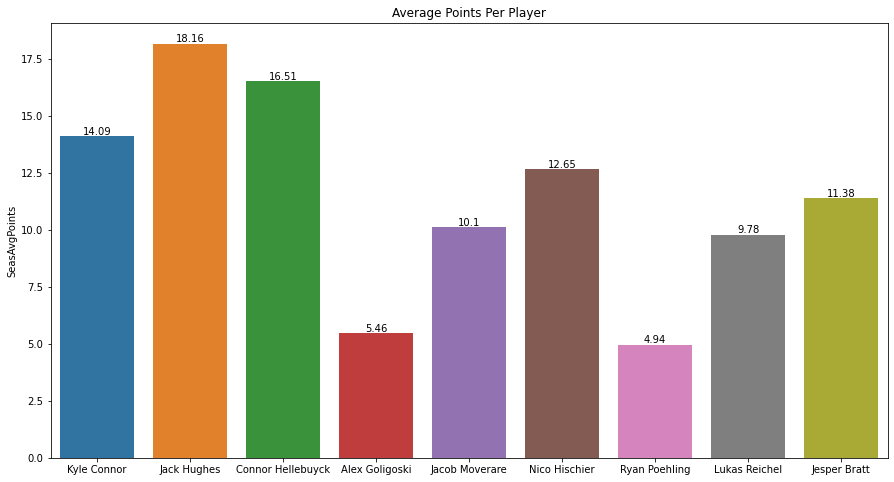

In [64]:
plt.figure(figsize = (15,8))
PointsPlot1 = sns.barplot(data=results1transposed, x=results1transposed.index, y='SeasAvgPoints')
for x in PointsPlot1.containers:
    PointsPlot1.bar_label(x,)
plt.title('Average Points Per Player')
plt.show()

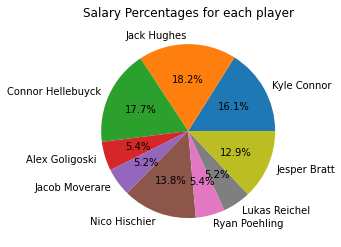

In [65]:
fig, ax = plt.subplots()
ax.pie(results1transposed['SeasSalary'], labels=results1transposed.index, autopct='%1.1f%%')
plt.title('Salary Percentages for each player')
plt.show()

#### MODEL 2

In [66]:
# Optimal Lineup
print("The following team will be formed, given the objective and the constraints.")
results2.head(0)

The following team will be formed, given the objective and the constraints.


Empty DataFrame
Columns: [Juuso Valimaki, Morgan Rielly, Anze Kopitar, Clayton Keller, Adrian Kempe, Artemi Panarin, Boone Jenner, Nick Schmaltz, Pheonix Copley]
Index: []

In [67]:
# Total Salary
print(f'Given the constraint, the total salary for the team above is ${TotalSalary:.2f}')

Given the constraint, the total salary for the team above is $49900.00


In [68]:
# Total Points/Objective Maximized
print(f'The total points for the team, the optimal points are {Total_Points_Obj2:.2f}')

The total points for the team, the optimal points are 311.80


In [69]:
# Total Average Points Per Game
print(f'Given the average points per game for each player, the total average points for the team are {TotalPoints}')

Given the average points per game for each player, the total average points for the team are 87.54999999999998


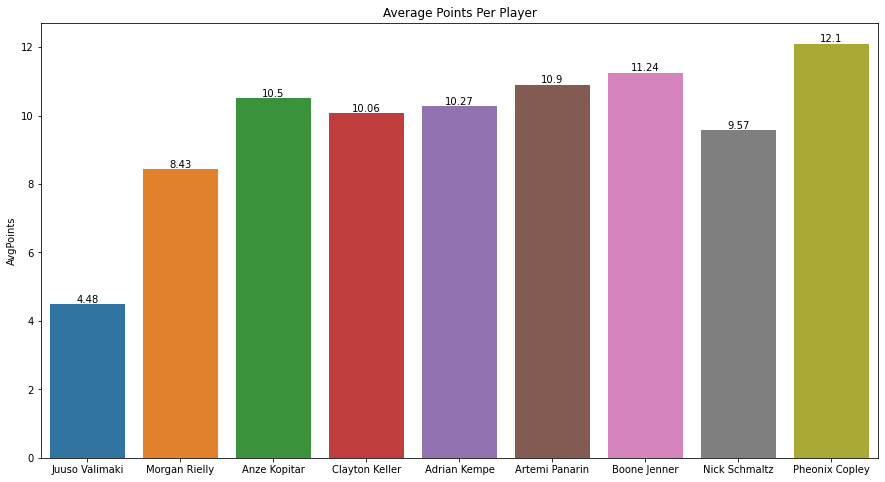

In [70]:
plt.figure(figsize = (15,8))
PointsPlot2 = sns.barplot(data=results2transposed, x=results2transposed.index, y='AvgPoints')
for x in PointsPlot2.containers:
    PointsPlot2.bar_label(x,)
plt.title('Average Points Per Player')
plt.show()

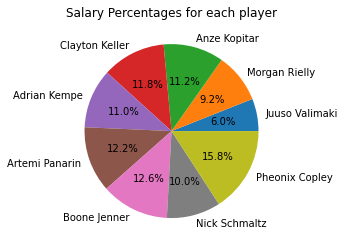

In [71]:
fig, ax = plt.subplots()
ax.pie(results2transposed['Salary'], labels=results2transposed.index, autopct='%1.1f%%')
plt.title('Salary Percentages for each player')
plt.show()

#### COMPARISON AND INSIGHTS

##### Based on the actual game statistics, we find the lineup to be meeting the constraints and also maximizing the points. This model considers scores and numbers from just one game. Even though we got an "optimal" lineup, there is definitely a need to compare with the model that considers the season statistics. This is because the latter considers performance over a period of time which can prove to be helpful.

##### Based on historical information/season statistics, we find a different lineup. The characteristics decided to form the team were different. Constraints were added for the +/- rating for the player; penalty minutes were attempted to be reduced as much as possible; only players who have played a certain number of games were included etc. For all of them, the averages were checked to set the "benchmarks" accordingly.

##### The season statistics model, Model 1, shows the optimal total points to be around 4004.32 and the salary to be USD 47,900. For the actual game model, Model 2, we received about 311.8 points and a value for salary to be USD 49,900. In a business scenario, we need to prioritize what is important to us. If reducing salary as much as possible and maintaining more buffer is important to us, then Model 1 is better. If we prefer looking at the actual game statistics and not see season statistics, then Model 2 is better.

##### The total average points per game for Model 1 came out to be 103.7 and 87.55 for Model 2. Considering that the former has a higher total, we can choose to go with that lineup. It also helps to check the graphs and see who those players are who increase the averages for the team in both models.

##### The charts created for both models above provide visuals for the lineup. For example, we can see in the first model that Jack Hughes is taking 18% of the total salary assigned and in the second model, Phoenix Copley takes 15% of the total. It is also important to note that Jack is also the one with the highest average points per game in that team. These charts help see if we want to cap the salary percentage for each person, increase the benchmark for average points per game etc. Our decisions depend on what is priority for us and what we use to evaluate the players' performance.